<a href="https://colab.research.google.com/github/thamadhi/telco-customer-churn-CM2604/blob/main/Notebooks/EDA_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
!git clone https://github.com/thamadhi/telco-customer-churn-CM2604.git

fatal: destination path 'telco-customer-churn-CM2604' already exists and is not an empty directory.


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings

In [191]:
data = 'telco-customer-churn-CM2604/data/Telco-Customer-Churn-unprocessed.csv'
df = pd.read_csv(data)
df.shape


(7043, 21)

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

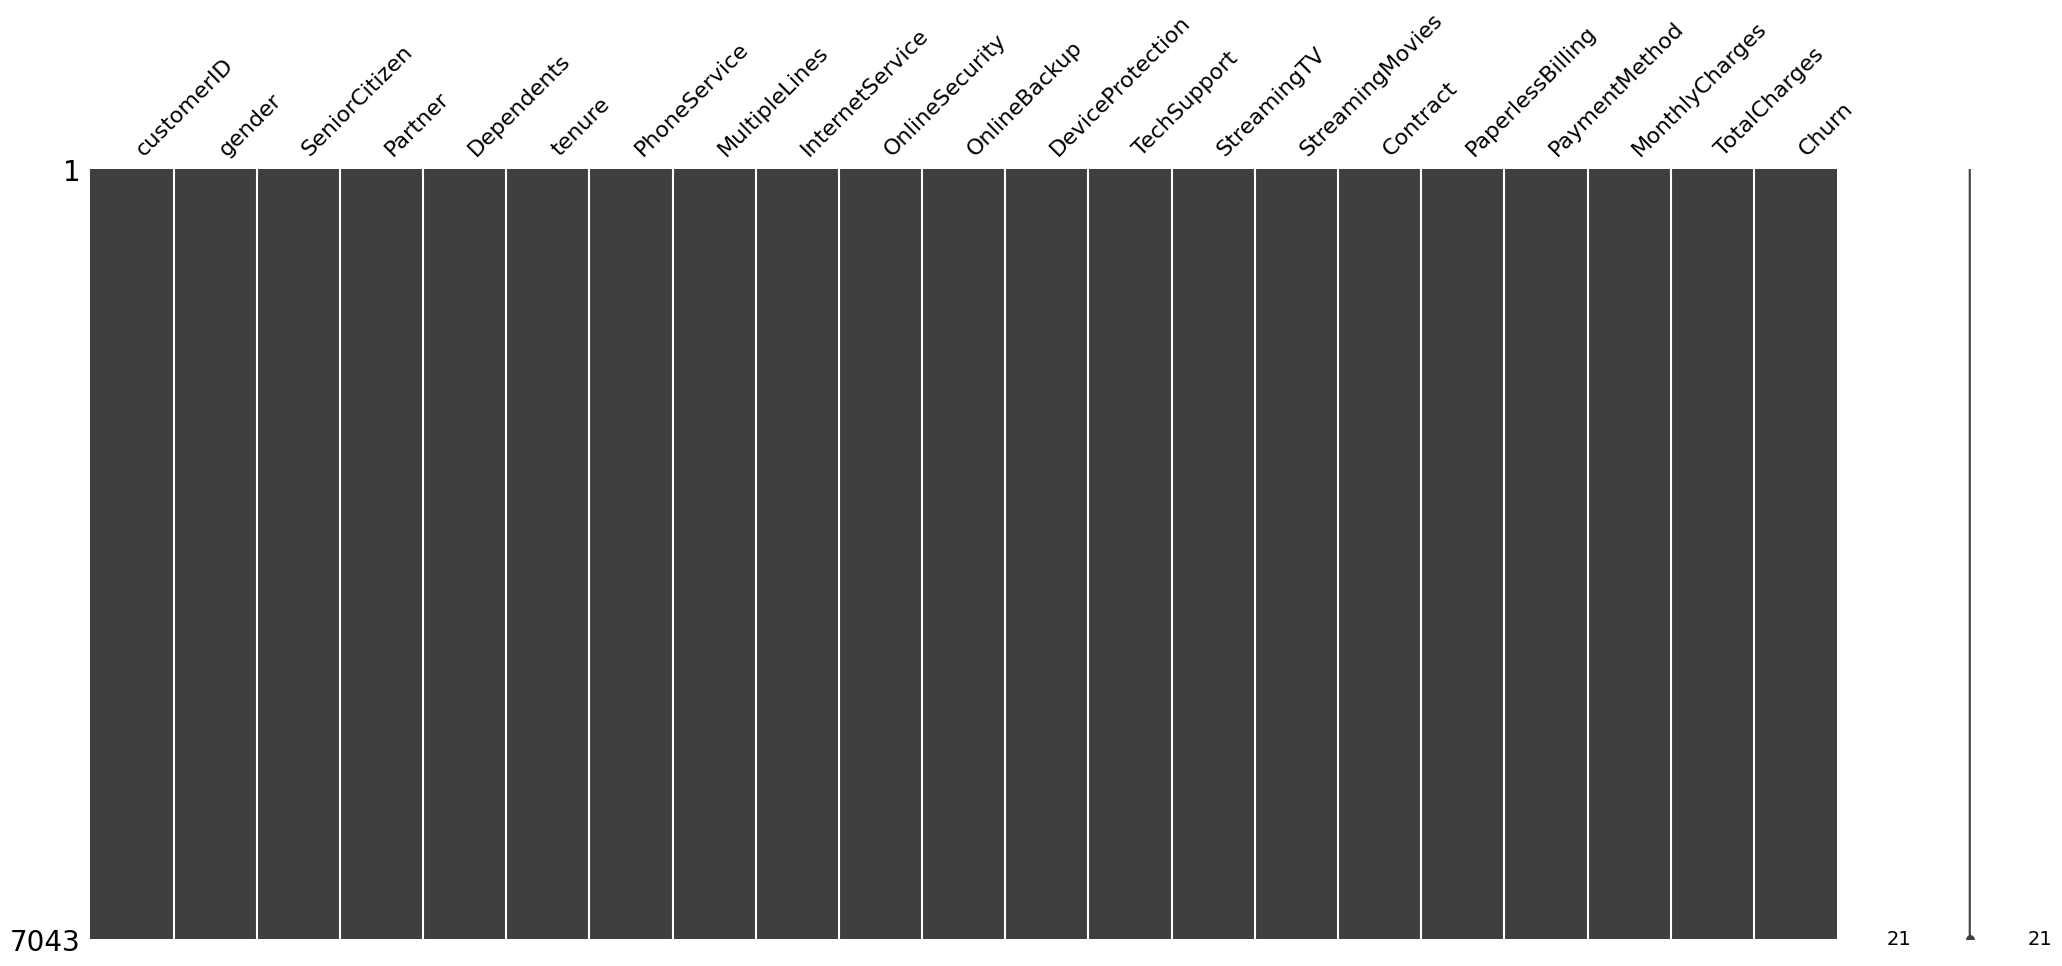

In [194]:
#using missingno library, plot the missing values in our dataframe
msno.matrix(df)

In [195]:
#Check TotalCharges Column that contain strings
df.loc[df["TotalCharges"].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Observation:
1.   There are no missing values in our columns according to the missinigno plot
2.   There are 11 TotalCharges data that contain strings with no value, therefore it will be excluded.



In [196]:
#Get TotalCharges data that does not contain strings
df = df.loc[~df["TotalCharges"].str.contains(" ")]
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [197]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Observation
the 11 columns were removed, it is now 7032. the total charges is now type float.

customer id is not relavent can be removed as well.

In [198]:
df.duplicated().sum()

np.int64(0)

no duplicate data

In [199]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No missing values

In [200]:
#create statistics table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [201]:
#seperate numerical and categorical column to understand better
categorical = ["customerID","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
numerical = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]

In [202]:
#create statistics table for numerical
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [203]:
df["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


# Observation


1.  'SeniorCitizen' is discrete and is a boolean data type because it only has the unique value 0 or 1.
2.  Tenure, MonthlyCharges, TotalCharges are Continous.
3. 'tenure' and 'TotalCharges' mean is greater than the median, therefore the distribution tends to positively skew
4. 'MonthlyCharges' mean is less than the median, distibution tends to negative skew




In [204]:
#create statistics table for categorical
df[categorical].describe().T

,count,unique,top,freq
customerID,7032,7032,3186-AJIEK,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [205]:
#identify values from categorical data
for col in categorical:
  print(df[col].value_counts(), "\n")

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64 

gender
Male      3549
Female    3483
Name: count, dtype: int64 

Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection
No                     3094


In [206]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
888,0048-LUMLS,Male,0,Yes,Yes,37,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Credit card (automatic),91.20,3247.55,No
4912,5281-BUZGT,Male,1,No,No,36,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.85,3186.70,Yes
4762,7594-LZNWR,Male,1,No,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),69.15,2275.10,No
2867,7244-KXYZN,Female,0,No,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.45,527.35,No
1023,7460-ITWWP,Female,1,Yes,No,45,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,86.10,3861.45,No


In [207]:
#checking unique variables
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [208]:
df['SeniorCitizen'].unique()

array([0, 1])

In [209]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Observation


1.   'gender' contains 2 unique values(male,female). most customers are male.
2.  Partner, Dependents, PhoneService, PaperlessBilling , Churn has 2 unique values (yes,no) and is boolean data type.
3. MultipleLines,InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, Techsupport, StreamingTV, StreamingMovies, Contract has 3 unique data types.
4. PaymentMethod has 4 unique values
5. Majority of the customers do not have 'partners', 'dependents' and they use phone service which has the most internet using 'FiberOptic'. they also don't have 'multipleline', 'online security', 'online backup', 'device protection', 'tech support', 'streaming TV' and 'streaming Movies'.
6. Most of the payments are 'Month-to-Month', payment methods used is 'Electronic Check' mostly and billing is paperless.



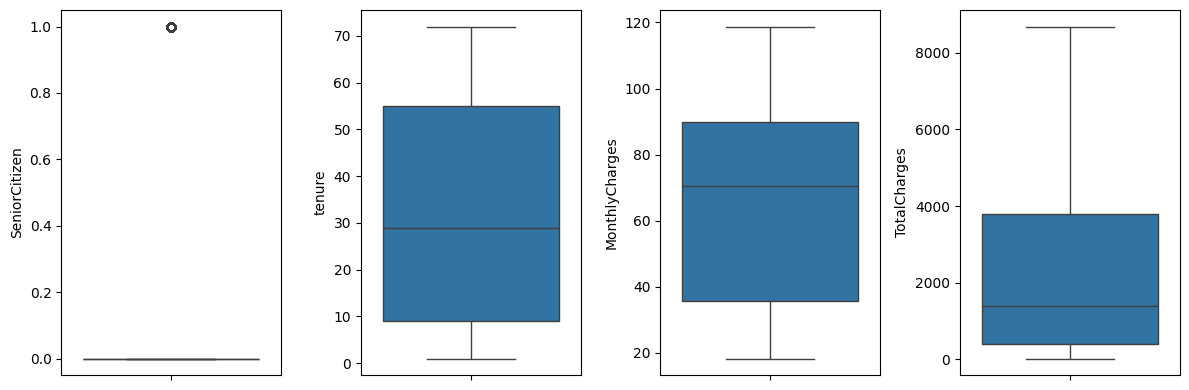

In [211]:
#check outliers using barplot
plt.figure(figsize = (12,4))

features = numerical
for i in range(0,len(features)):
  plt.subplot(1,len(features), i+1)
  sns.boxplot(data = df, y = features[i])
  plt.tight_layout()

In [212]:
#check outlier for senior citizen
outlier = df["SeniorCitizen"].max()

df[df["SeniorCitizen"] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


# Observation
There are 1142 outliers in 'SeniorCitizen'

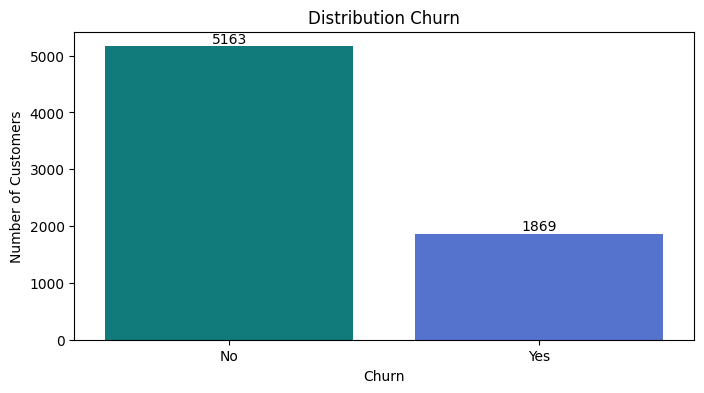

In [213]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = df["Churn"], palette=['darkcyan', 'royalblue'])
ax.bar_label(ax.containers[0], color = "black")
ax.bar_label(ax.containers[1], color="black")
plt.title("Distribution Churn")
plt.ylabel("Number of Customers")
plt.show()

# Observation
An imbalance in the distibution can be seen.

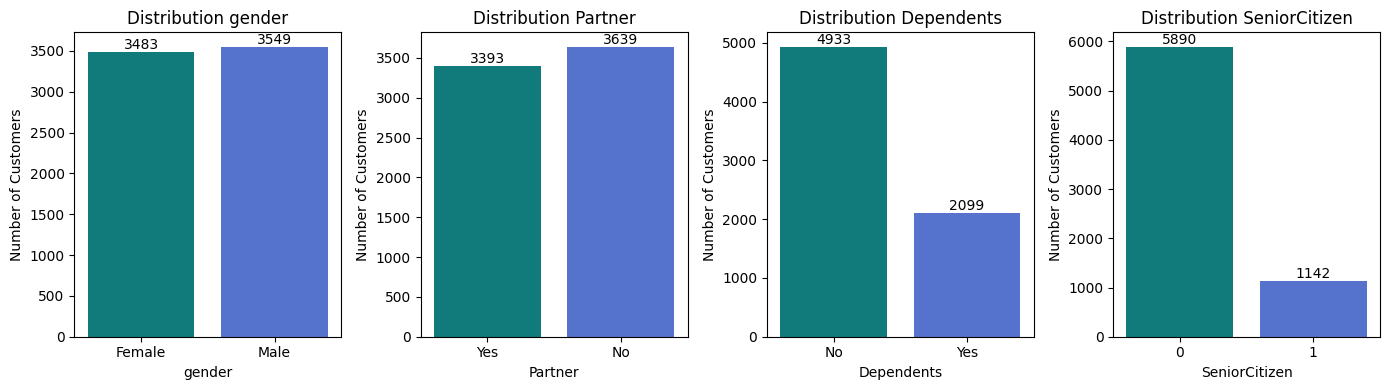

In [214]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (14,4))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]],palette=['darkcyan', 'royalblue'])
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

# Observation


1.   There are almost balanced number of gender and partner. However, there is a few more men but it can be ignored.
2. there is a noticibale difference in the SeniorCitizen, majority of the customers are young.
3. due to the majority of young customers it is can be seen that most customers do not have dependents.





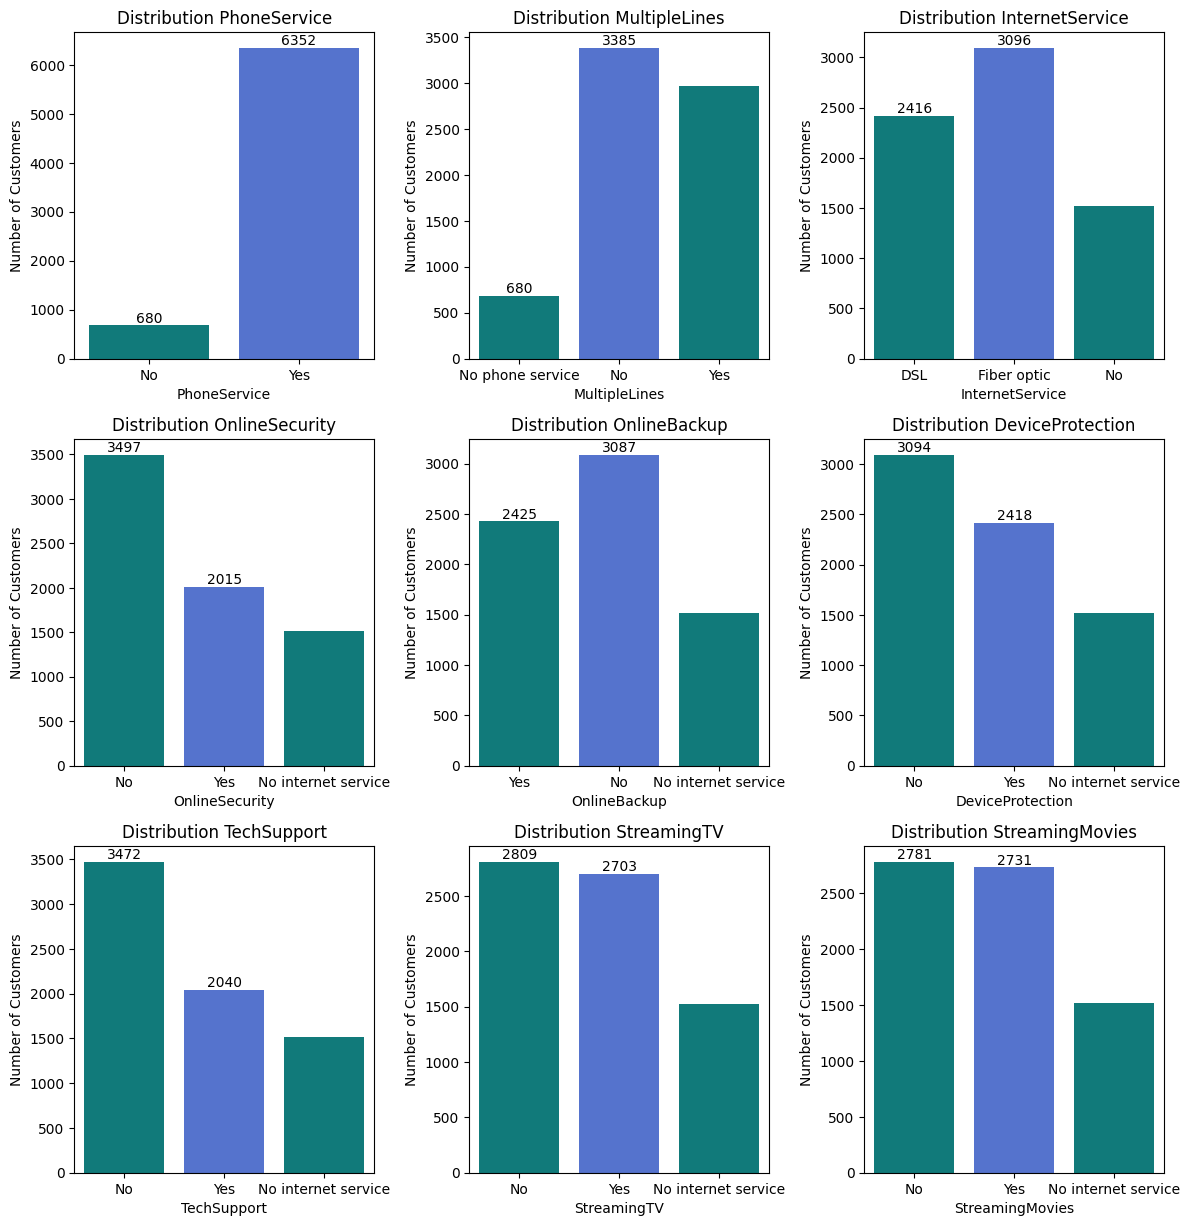

In [215]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (12,16))
for i in range(0,len(features)):
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.countplot(x=df[features[i]],palette=['darkcyan', 'royalblue'])
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

# Observation
1.   most customers have phoneservice, do not have multiplelines. and they tend to use fiber optic more over DSL.
2.  most people do not have the services OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport
3. for streaming TV and StreamingMovies the slight imbalance is caused due to no internet service but overall the distribution tends to be balanced.

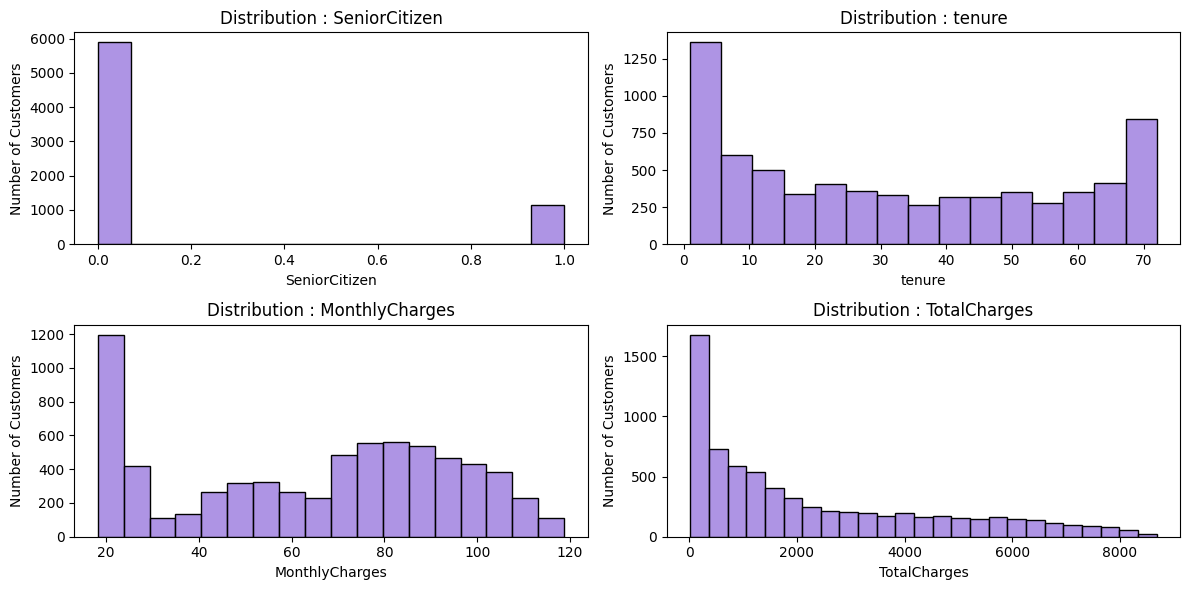

In [216]:
#create histogram to see distribution numerical data
features = numerical
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(2, len(features)//2, i+1)
  sns.histplot(x=df[features[i]], color='mediumpurple')
  plt.title("Distribution : " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

# Observation
1. SeniorCitizen is mostly at 0, it is not balanced, presenting that most of the customers are young.
2. a bimodal distribution can be seen,tenure distribution is not normal.
3. the onthly charges distribution is around 20. likewise the distribution is not normal.
4. the total charges is between 0 to 200, it tends to skew to the right.

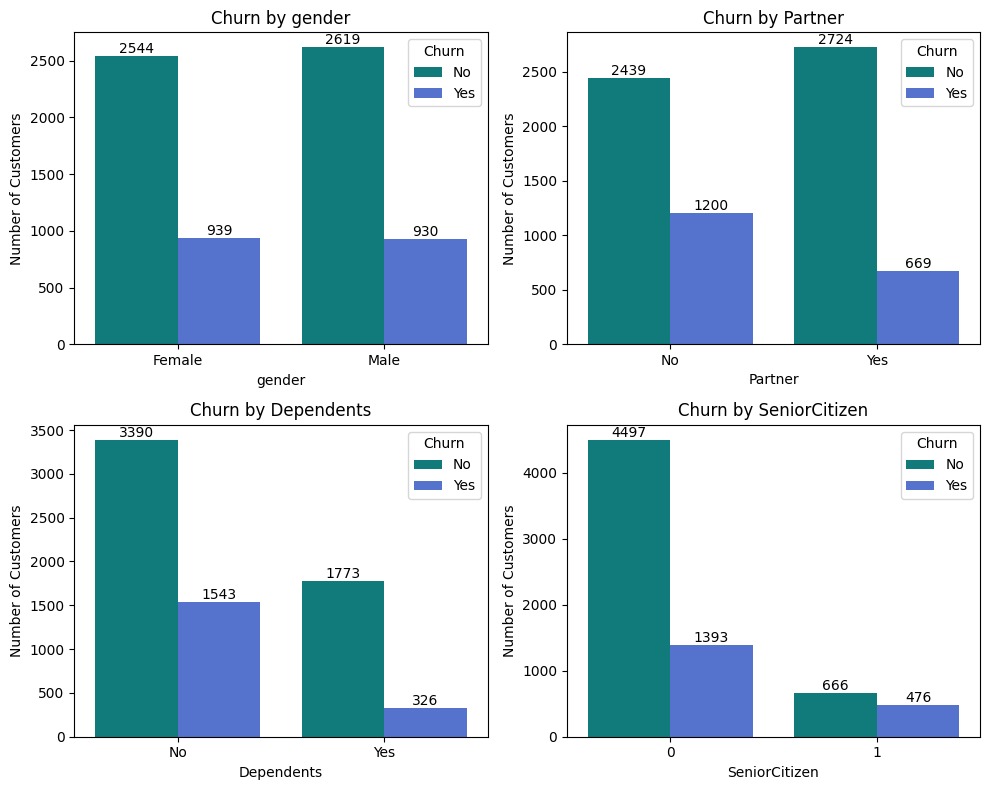

In [217]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (10,8))
for i in range(0,len(features)):
  churn_demografi = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(2, len(features)//2, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_demografi, palette=['darkcyan', 'royalblue'] )
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

# Observation


1.   churn does not affect gender
2.   churn is higher with customers who have partners
3.   churn is higher with customers who don't have dependents.
4.  as a percentage churn is higher in senior customers then younger customers.




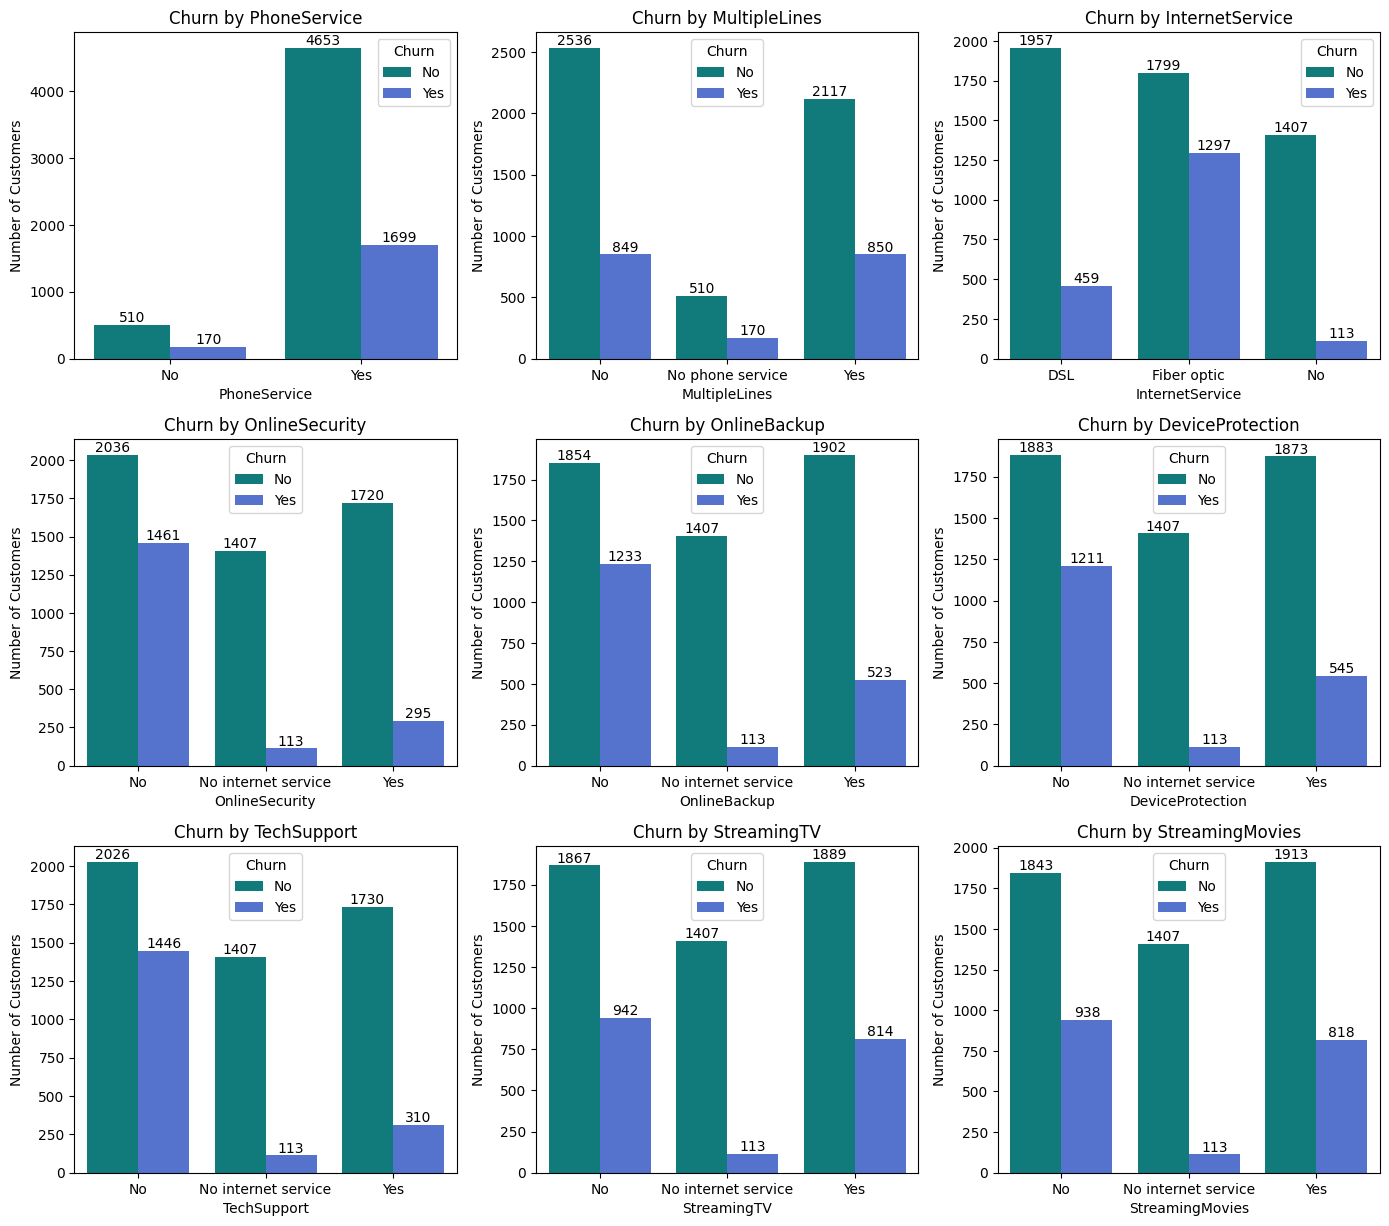

In [218]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (14,16))
for i in range(0,len(features)):
  churn_service = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_service, palette=['darkcyan', 'royalblue'] )
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

# Observation


1.   whether the customer has multiple lines or not the churn seems to be the same.
2.   churn is higher in fiber optic then other internet services.
3. churn is higher if you don't have Online Security, OnlineBackup, Device Protection and Tech Support services
4. churn on streamingTV and streamingmovie are almost the same. churn cant be based on these services.


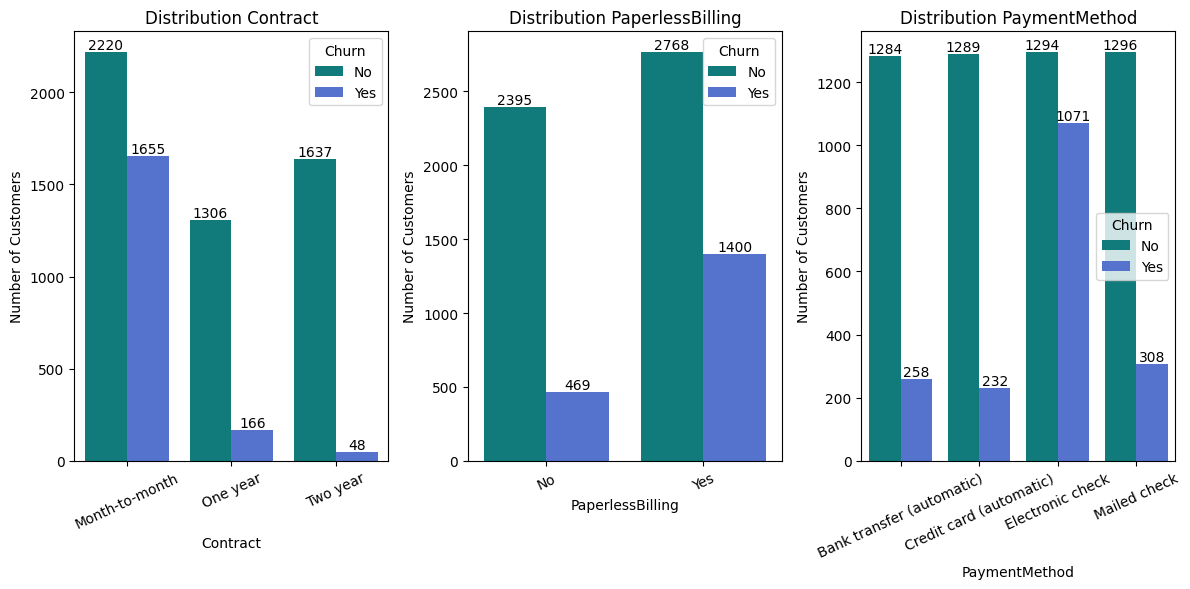

In [219]:
features = ["Contract","PaperlessBilling","PaymentMethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  churn_jenispembayaran = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(1, len(features), i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_jenispembayaran, palette=['darkcyan', 'royalblue'])
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

# Observation


1.   customer churn is higher when the payment is month to month
2.   customer churn is higher for paperlessbilling and to electronic payments.


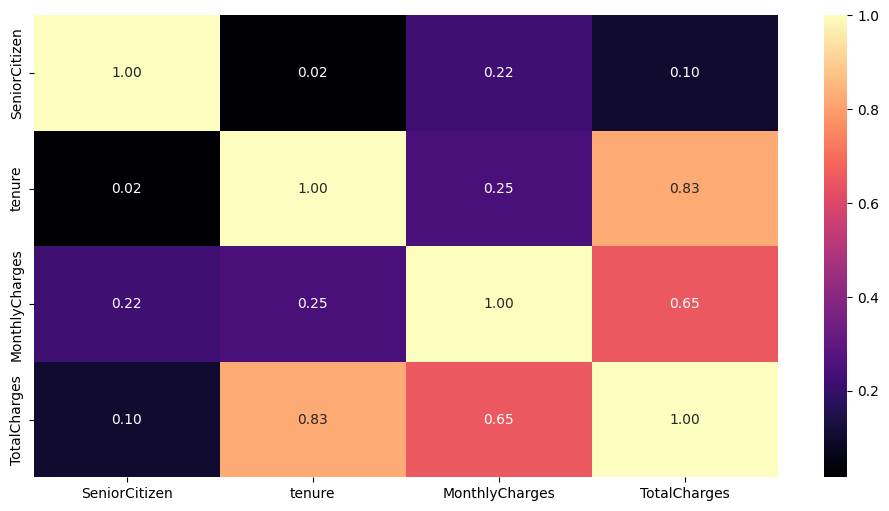

In [220]:

plt.figure(figsize = (12,6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, fmt =".2f", cmap="magma")
plt.show()

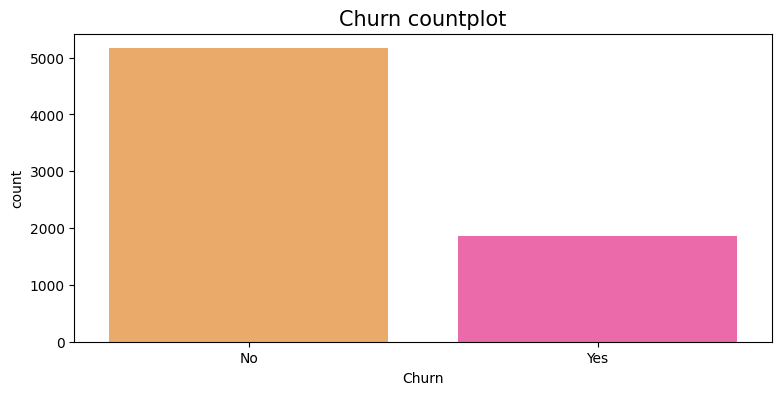

In [221]:
countplot_function(dataframe = df, column = "Churn", palette = 'spring_r')
plt.show()

# Observation


1.   We can see the number of people who have decided to leave after a certian period of time,A significantly large number of people did not leave the service
2.   With 71.4% customer retention, the service demonstrates
reasonable loyalty, though nearly 1 in 3 customers
discontinue service within the observed period.



In [222]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [223]:
def boxplot_function(dataframe, x_value, y_value, title_size=15, label_size=10,
                     figsize=(15, 10), palette='Set2'):

    plt.figure(figsize=(figsize))
    sns.boxplot(x=x_value, y=y_value, data=dataframe, palette=palette)
    plt.xlabel("{} Value".format(x_value), fontsize=label_size)
    plt.ylabel("{} Value".format(y_value), fontsize=label_size)
    plt.title("{} Vs. {} Boxplot".format(x_value, y_value), fontsize=title_size)
    plt.show()

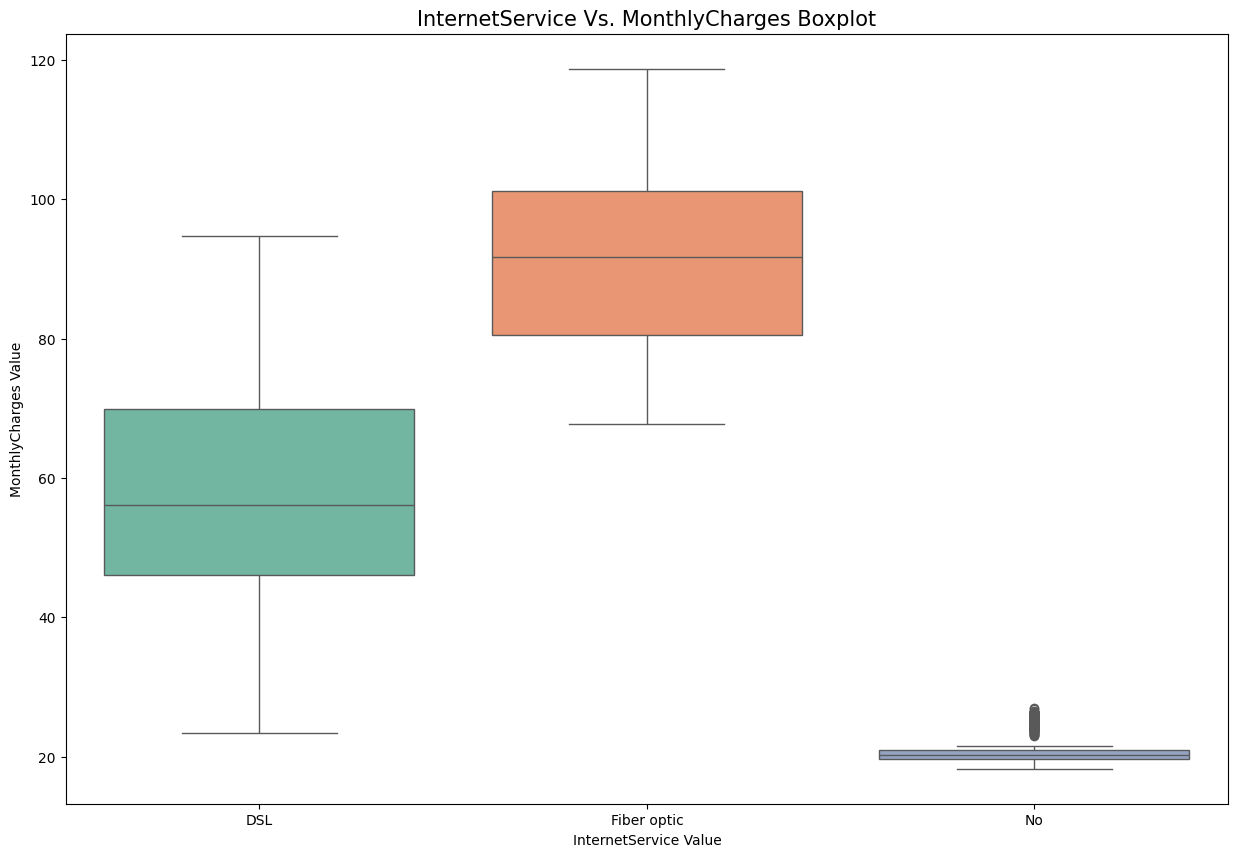

In [224]:
boxplot_function(dataframe=df, x_value = "InternetService", y_value="MonthlyCharges")

# Observation


People using 'fiber optic' have higher monthly charges, likewise people who use DSL or don't enroll in internet service have lower monthly charges.



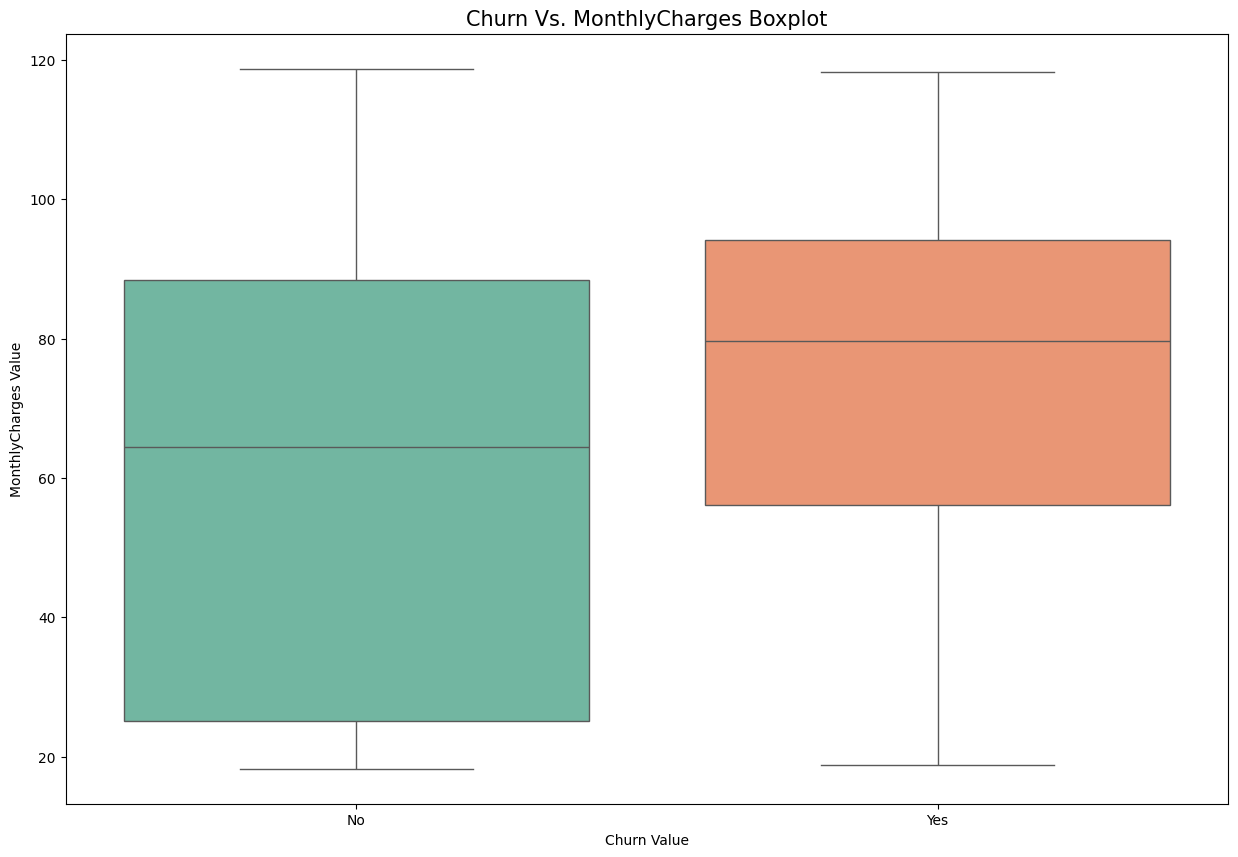

In [225]:
boxplot_function(dataframe=df, x_value = "Churn", y_value="MonthlyCharges")

# Observation

when the monthly charges are low less people leave the service.However, As the monthly charges are increasing, you can see that there is a higher chance of them leaving the service.




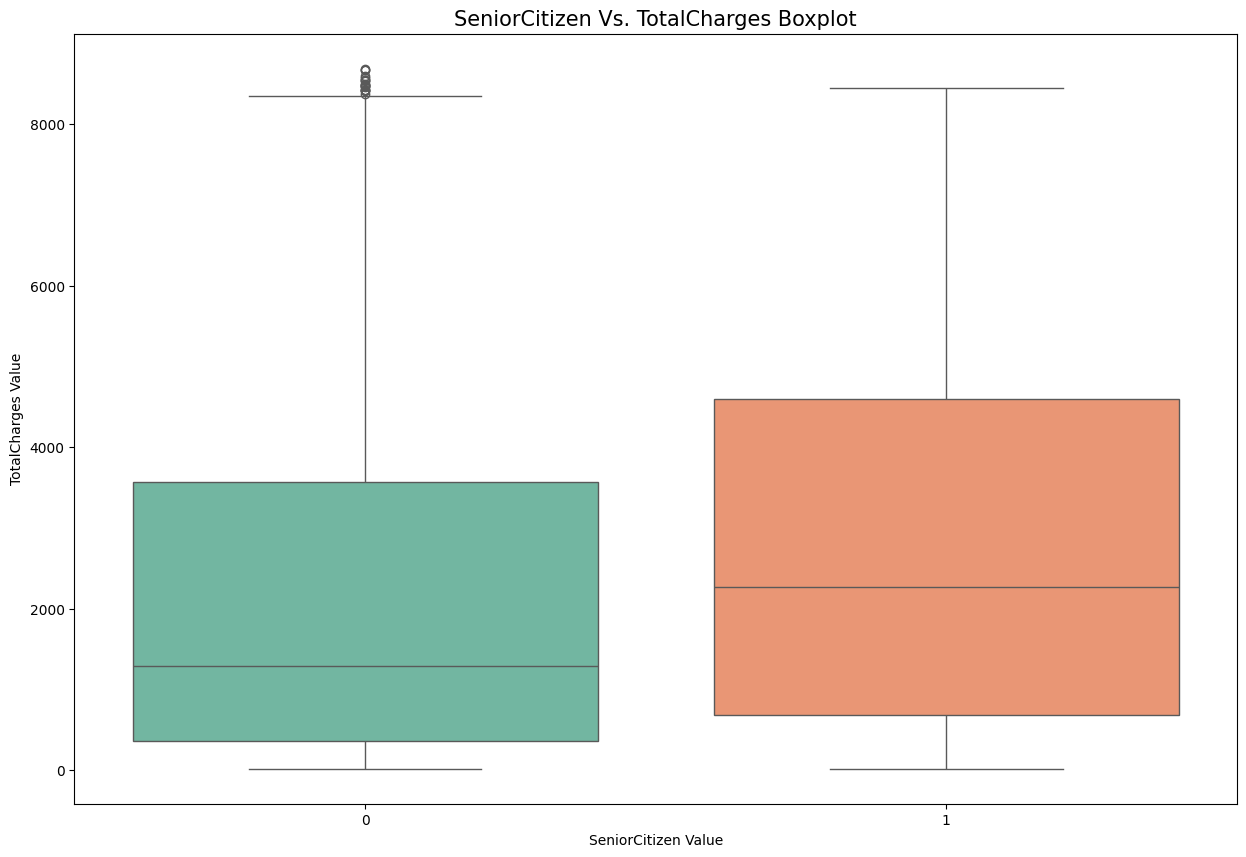

In [228]:
boxplot_function(dataframe=df, x_value = "SeniorCitizen", y_value="TotalCharges")

# Observation

Senior citizens have a higher income,suggesting that they probablly opt for more service charges with higher total charges.

according to the plot whether the person is a senior citizen or not does not have an impact on the total charges

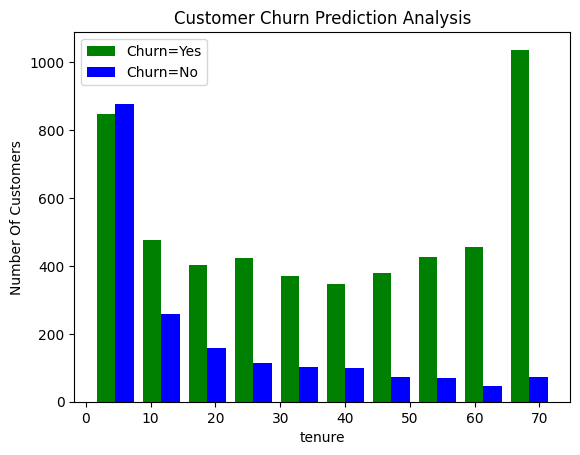

In [226]:

tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Analysis")

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','blue'], label=['Churn=Yes','Churn=No'])
plt.legend()

# Observation
customers who have tenure with 70 or more do not leave

<Axes: >

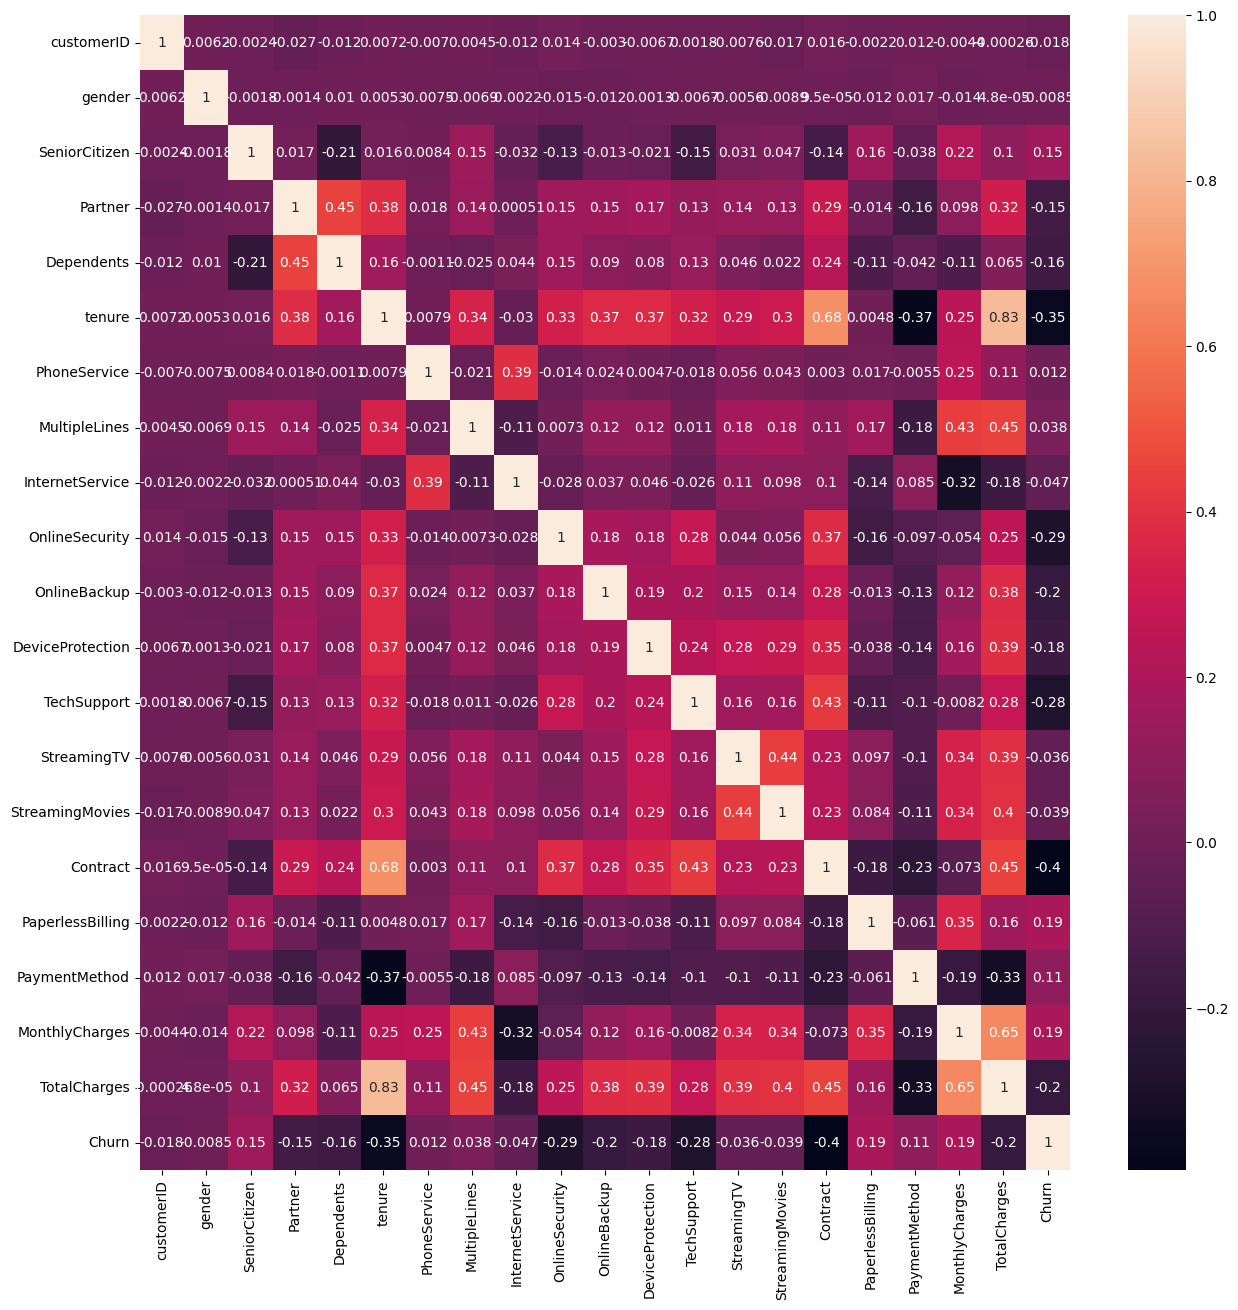

In [227]:
from sklearn.preprocessing import LabelEncoder
FeatureEncoded = df.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype=='object' else x)
plt.figure(figsize=(15, 15))
correlation=FeatureEncoded[FeatureEncoded.columns].corr()
sns.heatmap(correlation,annot=True)

# Observation
there are features SeniorCitizen, PhoneService, Multiplelines, PaperlessBilling, PaymentMethod, MonthyCharges and TotalCharges have a positive correlation value